## Shopify Data Science Challenge Winter 2022

### Question 1

**a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

To evaluate the calculation, we must first understand the dataset by using a statistical summary and visualizing the data. We'll begin by looking at the first several entries in the dataframe.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/UW/3A/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head(16) # First 16 entries in dataframe

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


Evidently, both the order amount and number of items in an order vary dramatically. We can get a more comprehensive assessment of the dataset by using the describe() function and highlight outliers using a boxplot.

In [ ]:
df.describe() # Statistical Summary

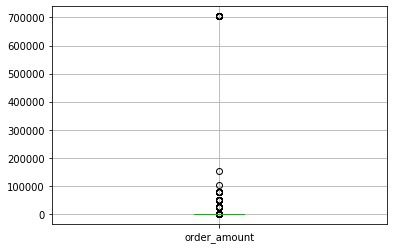

In [ ]:
df.boxplot('order_amount') # Boxplot of order amounts

As expected, the AOV of the dataset is the same as the mean of all the order amounts ($3145.13). The maximum order value is significantly larger than the third quartile value. Moreover, the standard deviation is notably high. Both of these observations suggest that the database has outliers in the order values and the boxplot confirms this suspicion. 

Notice that the summary of the total number of items per order has some unusual statistics as well. The maximum number of items in an order is 2000. Similar to the AOV, the mean number of items in an order is also being offset by these outliers since its standard deviation is large. Moreover, the mean number of items in an order is larger than the third quartile. Graphing the total items versus order amounts will offer more clarity into the multivariate outliers in the dataset.

Text(500, 300000, 'outliers')

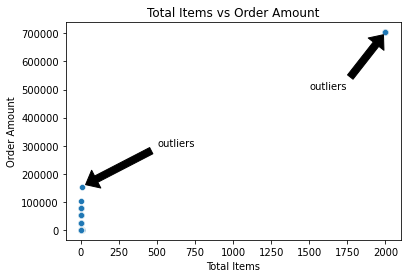

In [ ]:
scatter = sns.scatterplot(data=df, x="total_items",y="order_amount") # Scatter plot of Total Items vs Order Amount
scatter.set(xlabel='Total Items', ylabel='Order Amount')
scatter.set_title('Total Items vs Order Amount')
scatter.annotate('outliers', xy=(2000,704000), xytext=(1500,500000),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
scatter.annotate('outliers', xy=(6,154350), xytext=(500,300000),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))

In [ ]:
df["total_items"].value_counts() # Frequency count of the number of items in an order

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

The scatter plot highlights the there were orders that were two types of outliers. The first type of order outliers were ones which had high order values and high total number of items. The second type of order outliers were ones which had just a high value. 

As shown from the frequency count of the number of items in an order above, there were 17 orders with 2000 items. These orders had a significant affect on the average order value and average number of items per order.

After analyzing the graphs and statistical summary of the dataset, it's clear that the AOV of $3145.13 is not an accurate reflection of a typical order because the average is being skewed by order outliers.

**b. What metric would you report for this dataset?**

Instead of using the mean, the **median** order value would be a better metric to report for this dataset because our data is skewed and the mean is being affected by the order outliers as shown by the analysis in part a).

**c. What is its value?**

As shown in the statistical summary below, the second quartile is the median order value and this is **$284** which is more informative and reasonable statistic given that sneakers are a relatively affordable item. 

In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Question 2

**a. How many orders were shipped by Speedy Express in total?**

Speedy Express has shipped **54 orders**. Go here for image rendering issue: https://github.com/J-Douglas/ShopifyDS2021/blob/main/img/Q2A.jpg.

![Q2A SQL Query](https://drive.google.com/uc?export=view&id=1B-WxzmwOD-_FN2zZX5UPOq7dPQKlKT17)

**b. What is the last name of the employee with the most orders?**

The last name of the employee with the most orders is **Peacock**. Go here for image rendering issue: https://github.com/J-Douglas/ShopifyDS2021/blob/main/img/Q2B.jpg.

![Q2B SQL Query](https://drive.google.com/uc?export=view&id=1Fc2WkC2vnc10C82CuiMUdF_xFkTe64VT)

**c. What product was ordered the most by customers in Germany?**

Customers in Germany have ordered **Boston Crab Meat** the most. Go here for image rendering issue: https://github.com/J-Douglas/ShopifyDS2021/blob/main/img/Q2C.jpg.

![Q2C SQL Query](https://drive.google.com/uc?export=view&id=1gawGHrPdkuhQVjqkeiZN1M2deOxwDQWL)